# Epidemiological data processing

## Conduct K-Means clustering on the responses of countries to coronavirus

In [120]:
import pandas as pd

epi_data = pd.read_csv('../dataset/Epidemiological data.csv')

In [121]:
# Subset the following countries
countries_chosen = ['Brazil', 'Japan', 'China', 'Taiwan', 'Peru', 'USA', 'Sweden', 'Finland', 'Colombia',
 'India', 'Australia', 'Pakistan', 'S. Korea','Italy', 'Spain', 'Nepal', 'Vietnam']

epi_data = epi_data.loc[epi_data.loc[:, 'Country '].isin(countries_chosen), :]

In [122]:
# Filter for NAs
epi_data = epi_data.loc[~epi_data.loc[:, 'Total Deaths'].isna(), :]
epi_data = epi_data.loc[~(epi_data.loc[:, 'Probability (%) of dying between age 30 and exact age 70 from any of cardiovascular disease, cancer, diabetes, or chronic respiratory disease'] == 'No data'), :]
epi_data = epi_data.loc[~(epi_data.loc[:, 'Test/1M Pop'].isna()), :]
epi_data.loc[:, 'Test/1M Pop'] = epi_data.loc[:, 'Test/1M Pop'].str.replace(',', '').astype(int)
epi_data.loc[:, "Probability (%) of dying between age 30 and exact age 70 from any of cardiovascular disease, cancer, diabetes, or chronic respiratory disease"] = epi_data.loc[:, "Probability (%) of dying between age 30 and exact age 70 from any of cardiovascular disease, cancer, diabetes, or chronic respiratory disease"].astype(float)

In [123]:
# Add other info

epi_data.loc[:, 'Death Rate'] = epi_data.loc[:, 'Total Deaths'].str.replace(',', '').astype(int) / epi_data.loc[:, 'Total cases'].str.replace(',', '').astype(int)
epi_data.loc[:, 'Recovery Rate'] = epi_data.loc[:, 'Total Recovered'].str.replace(',', '').astype(int)  / epi_data.loc[:, 'Total cases'].str.replace(',', '').astype(int) 

In [124]:
# Select important columns
important_cols = ['Test/1M Pop', "Probability (%) of dying between age 30 and exact age 70 from any of cardiovascular disease, cancer, diabetes, or chronic respiratory disease", 'Death Rate', "Recovery Rate"]

country_vector = epi_data.loc[:, important_cols].values

In [232]:
# Conduct k-means clustering
from sklearn.cluster import KMeans
import numpy as np

k_list = range(1, 10)
total_variance_list = []

def conduct_kmeans(k, country_vector=country_vector):
    # Fit kmeans object
    km = KMeans(n_clusters=k).fit(country_vector)
    
    # Get the closest factor for each point
    
    cluster_prediction = km.predict(country_vector)
    
    # Get total variance for the points
    total_var = 0
    for i in range(len(country_vector)):
        closest_center_index = cluster_prediction[i] # Get closest center
        closest_center_coordinate = km.cluster_centers_[closest_center_index]
        
        point_var = np.sum(np.square(country_vector[i] - closest_center_coordinate)) # Squared distance from center
        
        total_var += point_var
        
    return cluster_prediction, total_var


for k in k_list:
    
    total_var_k = conduct_kmeans(k)[1]
    total_variance_list.append(total_var_k)

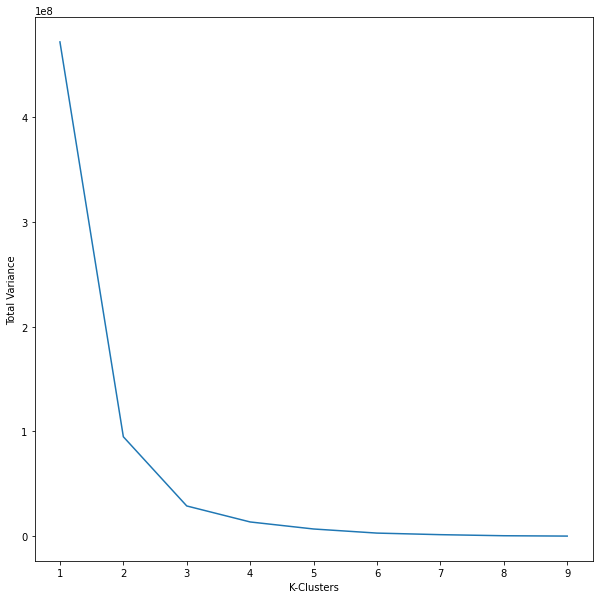

In [164]:
import matplotlib.pyplot as plt

plt.figure(0, figsize=(10, 10))
plt.plot(total_variance_list)
plt.xlabel('K-Clusters')
plt.ylabel('Total Variance')
plt.xticks(range(0, len(k_list)), k_list)

plt.show()

In [240]:
epi_data

Country  Total cases Total Deaths Total Recovered Active Cases  \
1         USA     641,299       28,383          47,977      564,939   
2       Spain     177,644       18,708          70,853       88,083   
3       Italy     165,155       21,645          38,092      105,418   
11     Brazil      28,320        1,736          14,026       12,558   
20      India      12,322          405           1,432       10,485   
21     Sweden      11,927        1,203             381       10,343   
22       Peru      11,475          254           3,108        8,113   
23   S. Korea      10,591          225           7,616        2,750   
25      Japan       8,100          146             853        7,101   
31  Australia       6,447           63           3,686        2,698   
32   Pakistan       6,383          111           1,446        4,826   
48    Finland       3,237           72             300        2,865   
49   Colombia       2,979          127             354        2,498   

   Serious, Critical Deaths/1M pop Total Tests  Test/1M Pop  \
1             13,477            86   3,220,623         9730   
2              7,371           400     600,000        12833   
3              3,079           358   1,117,404        18481   
11               296             8      62,985          296   
20               NaN           0.3     244,893          177   
21               954           119      74,600         7387   
22               146             8     109,385         3318   
23                55             4     534,552        10426   
25               152             1      89,551          708   
31                76             2     371,377        14564   
32                46           0.5      73,439          332   
48                75            13      48,828         8813   
49               106             2      45,423          893   

    Probability (%) of dying between age 30 and exact age 70 from any of cardiovascular disease, cancer, diabetes, or chronic respiratory disease  \
1                                                14.6                                                                                               
2                                                 9.9                                                                                               
3                                                 9.5                                                                                               
11                                               16.6                                                                                               
20                                               23.3                                                                                               
21                                                9.1                                                                                               
22                                               12.6                                                                                               
23                                                7.8                                                                                               
25                                                8.4                                                                                               
31                                                9.1                                                                                               
32                                               24.7                                                                                               
48                                               10.2                                                                                               
49                                               20.6                                                                                               

   Preparedness  INDEX  Death Rate  Reco

In [237]:
# Get the cluster k = 3 centers
country_centers = conduct_kmeans(3)[0]
country_center_dict = dict()
center_country_dict = {0:[], 1:[], 2:[]}
for i in range(len(epi_data.loc[:, 'Country '].values)):
    country = epi_data.loc[:, 'Country '].values[i]
    country_label = country_centers[i]
    country_center_dict[country] = country_label


for country, center in country_center_dict.items():
    center_country_dict[center].append(country)

In [239]:
center_country_dict

{0: ['Brazil', 'India', 'Peru', 'Japan', 'Pakistan', 'Colombia'],
 1: ['Spain', 'Italy', 'Australia'],
 2: ['USA', 'Sweden', 'S. Korea', 'Finland']}

In [220]:
# Helper function, generate random color (copied)
import random

def rand_web_color_hex():
    rgb = ""
    for _ in "RGB":
        i = random.randrange(0, 2**8)
        rgb += i.to_bytes(1, "big").hex()
    return f'#{rgb}'

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

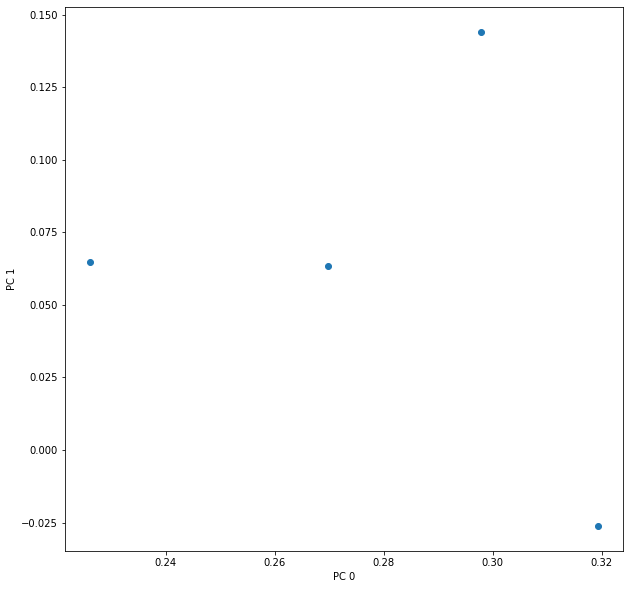

In [236]:
# Visualize the clusters in PCA

## Conduct PCA
from sklearn.decomposition import PCA

PCA_obj = PCA(n_components=2)
PCA_obj.fit(np.transpose(country_vector))

PC_0, PC_1 = PCA_obj.components_[0], PCA_obj.components_[1]
explained_variances = [PCA_obj.explained_variance_ratio_[0], PCA_obj.explained_variance_ratio_[1]]

# Plot 
plt.figure(1, figsize=(10, 10))
plt.xlabel('PC 0')
plt.ylabel('PC 1')

# For each center, get the boolean filter for countries within that center
for center_label, countries_in_cluster in center_country_dict.items():
    # Get country filter for PCs
    all_country_names = epi_data.loc[:, 'Country '].values
    country_boolean_filter = np.isin(all_country_names, countries_in_cluster)

    # Subset all_country_name, PC_0 and PC_1
    cluster_country_labels = all_country_names[country_boolean_filter]
    PC_0_cluster = PC_0[country_boolean_filter]
    PC_1_cluster = PC_1[country_boolean_filter]
    plt.scatter(PC_0_cluster, PC_1_cluster, c=f'C{center_label}', label=f'Cluster {center_label}')
    plt.

plt.legend()
plt.show()

# Plot With country names
plt.figure(2, figsize=(10, 10))
plt.xlabel(f'PC 0 ({explained_variances[0]})')
plt.ylabel(f'PC 1 ({explained_variances[1]})')

# Make color dictionary
col_dict = dict()
all_country_names = epi_data.loc[:, 'Country '].values
for geo_loc in list(set(all_country_names)):
    col_dict[geo_loc] = rand_web_color_hex()
    

for i in range(len(all_country_names)):
    country_name = all_country_names[i]
    plt.scatter(PC_0[i], PC_1[i], c=col_dict[country_name], label=country_name)
        
plt.legend()
plt.show()

array([[9.73000000e+03, 1.46000000e+01, 4.42586064e-02, 7.48122171e-02],
       [1.28330000e+04, 9.90000000e+00, 1.05311747e-01, 3.98848258e-01],
       [1.84810000e+04, 9.50000000e+00, 1.31058702e-01, 2.30643941e-01],
       [2.96000000e+02, 1.66000000e+01, 6.12994350e-02, 4.95268362e-01],
       [1.77000000e+02, 2.33000000e+01, 3.28680409e-02, 1.16214900e-01],
       [7.38700000e+03, 9.10000000e+00, 1.00863587e-01, 3.19443280e-02],
       [3.31800000e+03, 1.26000000e+01, 2.21350763e-02, 2.70849673e-01],
       [1.04260000e+04, 7.80000000e+00, 2.12444528e-02, 7.19101124e-01],
       [7.08000000e+02, 8.40000000e+00, 1.80246914e-02, 1.05308642e-01],
       [1.45640000e+04, 9.10000000e+00, 9.77198697e-03, 5.71738793e-01],
       [3.32000000e+02, 2.47000000e+01, 1.73899420e-02, 2.26539245e-01],
       [8.81300000e+03, 1.02000000e+01, 2.22428174e-02, 9.26784059e-02],
       [8.93000000e+02, 2.06000000e+01, 4.26317556e-02, 1.18831823e-01]])

In [186]:
PCA_obj.components_

array([[ 0.2978804 ,  0.39296938,  0.56597342,  0.00889169,  0.00518263,
         0.22617009,  0.10149914,  0.31926184,  0.02159924,  0.44599735,
         0.00991505,  0.26983751,  0.02714112],
       [ 0.14405845, -0.02122015, -0.13202187,  0.35645849,  0.51163491,
         0.06489952,  0.21530988, -0.02623535,  0.17188511, -0.07149489,
         0.53879559,  0.06337149,  0.43852358]])